# Step 2: Enriching and cleaning
This jupyter notebook should only be opened after running the "1-downloading-and-cleaning.py" script. That script will download all the data necesary for this jupyter notebook and save it in the data folder. If it hasnt been run, remove the "#" bellow and run that cell, it will run the script. The next cell will import all the libraries needed to run this jupyter notebook.

In [82]:
#! python 1-downloading-and-cleaning.py
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as mp
import matplotlib.pyplot as plt
from python_scripts import cleaning as cl

## Loading our data
The previous script downloaded data from transit accidents in Barcelona from 01/01/2010 to 12/31/2021, cleaned it and stored it in a csv file in the folder called "data". It also downloaded weather information for the same period in Bacerlona from the Historical weather API from OpenMeteo:

https://open-meteo.com/

We will now proceed to load this data, enrich it into a single data source (taking the accidents data base and enricihing it with weather data).
First, we need to load the data:

In [83]:
accidents = pd.read_csv("data/accidents_clean.csv")
weather_hourly = pd.read_csv("data/hourly_weather.csv")
weather_daily = pd.read_csv("data/daily_weather.csv")

/var/folders/zt/x4f866fn6v5b11fyl7jzdnk80000gn/T/ipykernel_5060/2871015148.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  accidents = pd.read_csv("data/accidents_clean.csv")


In [84]:
accidents.sample(5)

,Unnamed: 0,case_id,district_id,district_name,neighborhood_id,neighborhood_name,street_code,street_name,postal_code,type_day,cyrcadian,cause_incident,n_deaths,n_wounded_mild,n_wounded_severe,n_victims,n_vehicles,date
55967,55968,2017S006069,3.0,Sants-Montjuïc,12,la Marina del Prat Vermell,701265.0,Litoral (Besòs) ...,1380000,Laboral,Tarda,No és causa del vianant,0.0,1.0,0.0,1.0,2.0,2017-07-12 15:00:00
88803,88804,2013S001982,9.0,Sant Andreu,91-9-61,la Sagrera,121402.0,Felip II,0006 0006,Laboral,Tarda,Desconegut,0.0,1.0,0.0,1.0,2.0,2013-03-15 17:00:00
77326,77327,2016S008421,8.0,Nou Barris,53,la Trinitat Nova,120807.0,Favència,0343 0349,Laboral,Matí,No és causa del vianant,0.0,1.0,0.0,1.0,2.0,2016-11-04 12:00:00
62709,62710,2012S005871,3.0,Sants-Montjuïc,31-3-11,el Poble Sec,261004.0,Poeta Cabanyes,0020 0020,Laboral,Nit,Desconegut,0.0,1.0,0.0,1.0,1.0,2012-08-15 01:00:00
79001,79002,2016S000869,2.0,Eixample,10,Sant Antoni,323203.0,Sepúlveda,0187 0189,Laboral,Matí,No és causa del vianant,0.0,1.0,0.0,1.0,2.0,2016-02-03 12:00:00


In [85]:
weather_daily.sample(5)

,Unnamed: 0,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,sunrise,sunset,precipitation_sum,rain_sum,precipitation_hours,date
1833,daily,14.1,5.3,9.0,2.4,12.0,6.9,2015-01-08T08:15,2015-01-08T17:40,0.0,0.0,0.0,2015-01-08
1750,daily,25.0,16.5,20.5,17.1,27.8,21.8,2014-10-17T07:04,2014-10-17T18:09,0.0,0.0,0.0,2014-10-17
644,daily,21.5,17.2,19.4,18.3,23.7,20.8,2011-10-07T06:52,2011-10-07T18:25,10.5,10.5,18.0,2011-10-07
365,daily,13.0,8.3,10.5,6.5,12.2,9.1,2011-01-01T08:15,2011-01-01T17:33,0.0,0.0,0.0,2011-01-01
1271,daily,22.3,18.1,20.1,18.9,23.4,21.1,2013-06-25T05:17,2013-06-25T20:30,1.2,1.2,5.0,2013-06-25


In [86]:
weather_hourly.sample(5)

,Unnamed: 0,temperature_2m,relativehumidity_2m,dewpoint_2m,precipitation,rain,windspeed_100m,winddirection_100m,soil_temperature_100_to_255cm,soil_moisture_100_to_255cm,date
21368,hourly,21.0,62,13.5,0.0,0.0,2.9,240,15.9,0.150,2012-06-09 08:00:00
44491,hourly,9.6,83,6.8,0.0,0.0,12.8,196,12.2,0.197,2015-01-28 19:00:00
29384,hourly,17.9,88,15.9,0.0,0.0,6.5,56,12.7,0.148,2013-05-09 08:00:00
78219,hourly,11.6,88,9.6,0.0,0.0,10.1,2,17.5,0.175,2018-12-04 03:00:00
30804,hourly,28.9,51,17.9,0.0,0.0,12.7,165,17.9,0.147,2013-07-07 12:00:00


## Merging weather information with accident information
Since we have hour information for every entry in our accidents list, lets add the weather information:

In [87]:
full_data = accidents
full_data = full_data.merge(weather_hourly, left_on="date", right_on="date", how="left")

In [88]:
full_data.sample(5)

,Unnamed: 0_x,case_id,district_id,district_name,neighborhood_id,neighborhood_name,street_code,street_name,postal_code,type_day,...,Unnamed: 0_y,temperature_2m,relativehumidity_2m,dewpoint_2m,precipitation,rain,windspeed_100m,winddirection_100m,soil_temperature_100_to_255cm,soil_moisture_100_to_255cm
72001,72002,2016S000890,5.0,Sarrià-Sant Gervasi,23,Sarrià,701268.0,Dalt (Llobregat),690000,Laboral,...,hourly,5.5,79,2.1,0.0,0.0,6.8,25,12.4,0.181
86814,86815,2013S006145,3.0,Sants-Montjuïc,33-3-16,la Bordeta,169409.0,Corts Catalanes,0181 0247,Laboral,...,hourly,27.4,43,13.9,0.0,0.0,5.1,225,22.3,0.145
21952,21953,2010S008285,3.0,Sants-Montjuïc,33-3-15,Hostafrancs,169409.0,Corts Catalanes,0353 0353,Laboral,...,hourly,7.5,81,4.5,0.0,0.0,22.5,283,15.9,0.153
97796,97797,2018S005929,10.0,Sant Martí,64,el Camp de l'Arpa del Clot,368507.0,Xifré ...,23,Laboral,...,hourly,25.1,91,23.4,0.0,0.0,4.8,333,21.8,0.165
5345,5345,2015S006452,2.0,Eixample,9.0,la Nova Esquerra de l'Eixample,89004.0,Consell de Cent,0104 0104,Laboral,...,hourly,25.9,78,21.7,0.0,0.0,12.0,249,23.2,0.182


Excelent! Now we have weather information for every incident. Lets clean up a few columns and export our data:

In [89]:
cl.delete_columns(full_data,['Unnamed: 0_x', "Unnamed: 0_y"])
full_data.sample(5)

Deleted columns:  ['Unnamed: 0_x', 'Unnamed: 0_y']


,case_id,district_id,district_name,neighborhood_id,neighborhood_name,street_code,street_name,postal_code,type_day,cyrcadian,...,date,temperature_2m,relativehumidity_2m,dewpoint_2m,precipitation,rain,windspeed_100m,winddirection_100m,soil_temperature_100_to_255cm,soil_moisture_100_to_255cm
768,2015S006326,4.0,Les Corts,19.0,les Corts,180900.0,Loreto,0004 0006,Laboral,Nit,...,2015-08-21 01:00:00,22.7,97,22.1,0.0,0.0,10.9,253,23.2,0.182
45736,2011S008061,4.0,Les Corts,41-4-19,les Corts,144601.0,Diagonal,0579 0587,Laboral,Tarda,...,2011-11-29 16:00:00,16.8,75,12.4,0.0,0.0,9.8,234,18.3,0.151
90377,2013S005303,3.0,Sants-Montjuïc,31-3-11,el Poble Sec,86902.0,Nou de la Rambla,0109B0109B,Laboral,Nit,...,2013-07-20 03:00:00,22.7,88,20.5,0.0,0.0,2.3,18,19.4,0.147
84188,2013S006752,2.0,Eixample,21-2-10,Sant Antoni,198804.0,Paral·lel,0206 0206,Laboral,Tarda,...,2013-09-24 17:00:00,23.9,82,20.5,0.0,0.0,22.4,204,22.1,0.145
58911,2017S008780,5.0,Sarrià-Sant Gervasi,25,Sant Gervasi - la Bonanova,143904.0,General Mitre / Mandri ...,0115 0115,Laboral,Tarda,...,2017-10-23 18:00:00,18.5,75,14.0,0.0,0.0,8.0,190,21.7,0.160


## Analyzing correlations in the merged dataset
Now that we have a cleaner data set, lets ananlyze correlations so that we know what to visualize in the next step:

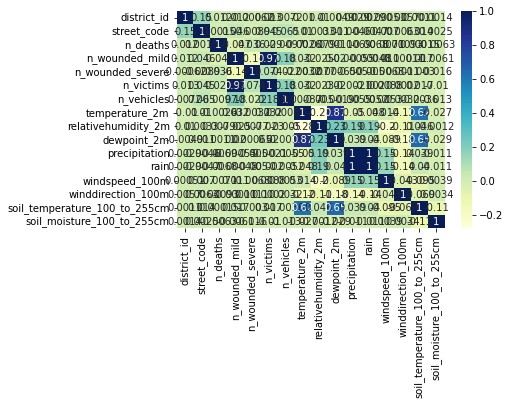

In [90]:
corr_matrix = full_data.corr()
dataplot = sns.heatmap(corr_matrix, cmap="YlGnBu", annot=True)
mp.show()

Looks like we dont have much correlation between the weather data and the accident data. Lets try grouping the accident data by the day and using our daily weather data to see if we have a stronger correlation (this would add the number of victims per day and might affect the correlation).

## Grouping data to check if it affects correlation

In [91]:
accidents_grouped = accidents
cl.delete_columns(accidents_grouped, ['Unnamed: 0', 'district_id', 'district_name', 'neighborhood_id','neighborhood_name', 'street_code', 'street_name','postal_code', 'type_day', 'cyrcadian','cause_incident'])
accidents_grouped.sample(5)

Deleted columns:  ['Unnamed: 0', 'district_id', 'district_name', 'neighborhood_id', 'neighborhood_name', 'street_code', 'street_name', 'postal_code', 'type_day', 'cyrcadian', 'cause_incident']


,case_id,n_deaths,n_wounded_mild,n_wounded_severe,n_victims,n_vehicles,date
103549,2019S002931,0.0,1.0,0.0,1.0,2.0,2019-04-13 22:00:00
24640,2010S003001,0.0,1.0,0.0,1.0,2.0,2010-05-03 11:00:00
42943,2011S006510,0.0,1.0,0.0,1.0,2.0,2011-09-29 07:00:00
6590,2015S002072,0.0,1.0,0.0,1.0,2.0,2015-03-18 20:00:00
92963,2018S001100,0.0,1.0,0.0,1.0,2.0,2018-02-09 15:00:00


In [92]:
accidents_grouped["date"] = pd.to_datetime(accidents_grouped['date'])
accidents_grouped = accidents_grouped.groupby(pd.Grouper(key="date", axis = 0, freq="D")).sum()
accidents_grouped.sample(5)

,n_deaths,n_wounded_mild,n_wounded_severe,n_victims,n_vehicles
date,,,,,
2015-01-07,0.0,28.0,1.0,29.0,51.0
2020-10-11,0.0,21.0,1.0,22.0,39.0
2019-09-21,0.0,28.0,1.0,29.0,46.0
2015-06-09,0.0,21.0,4.0,25.0,41.0
2013-03-05,0.0,26.0,2.0,28.0,42.0


Now that we have our aggregated data set, lets add the weather information.

## Merging grouped data with daily weather information

Daily weather data did not retain its DateTime type when importing the CSV. This will give an error when merging, so we will change it first.

In [93]:
weather_daily["date"] = pd.to_datetime(weather_daily["date"])

Now we will merge our newly created grouped accident data (by day) with our daily weather information:

In [94]:
grouped_data = accidents_grouped
grouped_data = grouped_data.merge(weather_daily, left_on="date", right_on="date", how="left")
grouped_data.sample(5)

,date,n_deaths,n_wounded_mild,n_wounded_severe,n_victims,n_vehicles,Unnamed: 0,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,sunrise,sunset,precipitation_sum,rain_sum,precipitation_hours
2032,2015-07-26,0.0,22.0,1.0,23.0,31.0,daily,29.3,21.8,25.9,23.4,31.0,28.2,2015-07-26T05:38,2015-07-26T20:16,0.0,0.0,0.0
1144,2013-02-18,0.0,30.0,0.0,30.0,56.0,daily,13.3,10.0,11.5,8.6,11.0,9.9,2013-02-18T07:40,2013-02-18T18:30,0.3,0.3,3.0
1526,2014-03-07,0.0,32.0,0.0,32.0,69.0,daily,18.3,5.5,11.6,2.8,16.1,9.2,2014-03-07T07:14,2014-03-07T18:49,0.0,0.0,0.0
371,2011-01-07,0.0,19.0,0.0,19.0,30.0,daily,15.1,7.8,10.9,5.7,14.0,9.5,2011-01-07T08:15,2011-01-07T17:39,0.0,0.0,0.0
2372,2016-06-30,0.0,40.0,1.0,41.0,65.0,daily,26.1,20.4,23.6,23.4,28.9,26.5,2016-06-30T05:19,2016-06-30T20:30,0.0,0.0,0.0


## Correlations in grouped data
Now that we have our grouped data set with weather information, let's see if the grouping affected correlation:

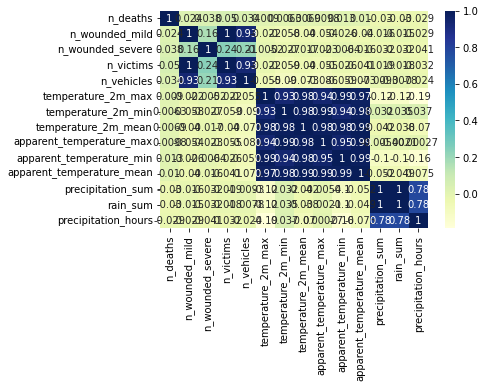

In [95]:
corr_matrix_grouped = grouped_data.corr()
dataplot_grouped = sns.heatmap(corr_matrix_grouped, cmap="YlGnBu", annot=True)
mp.show()

Looks like they are still not correlated.
We might have an issue with the types of accidents being recorded. Our accidents data categorizes each accident by the column "cause_incident". 

## Analyzing correlations based on incident type:
Lets generate a correlation matrix for every type of accident:

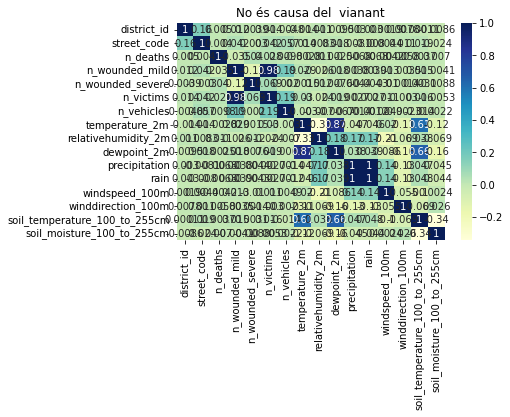

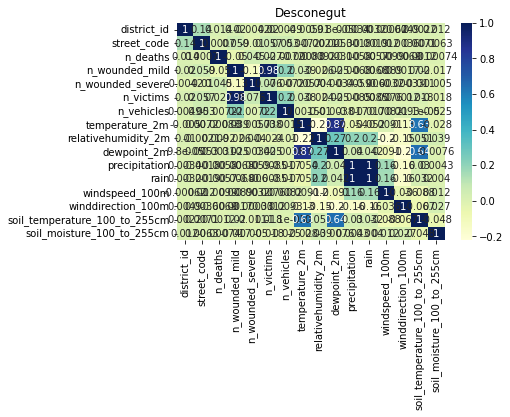

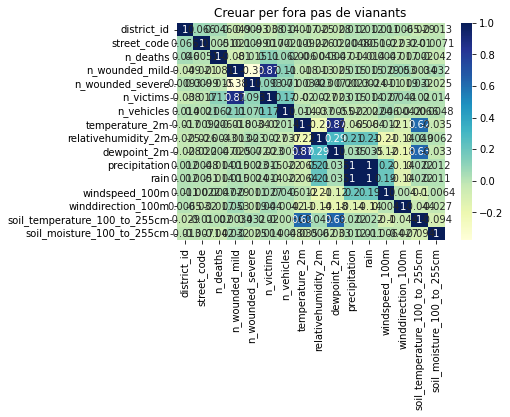

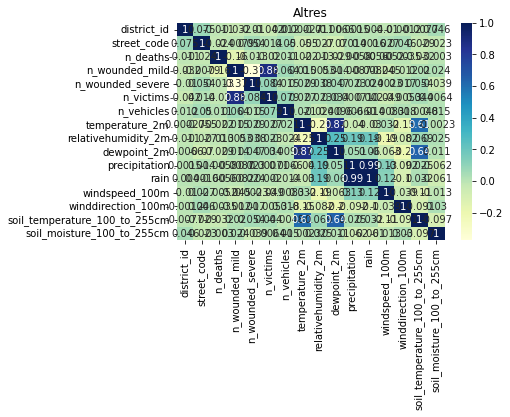

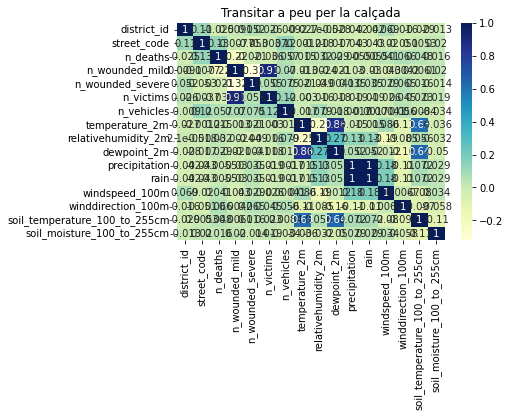

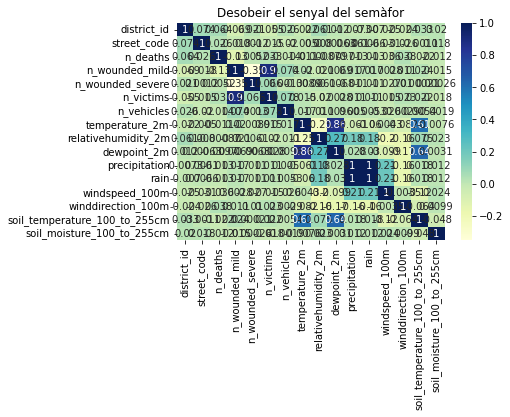

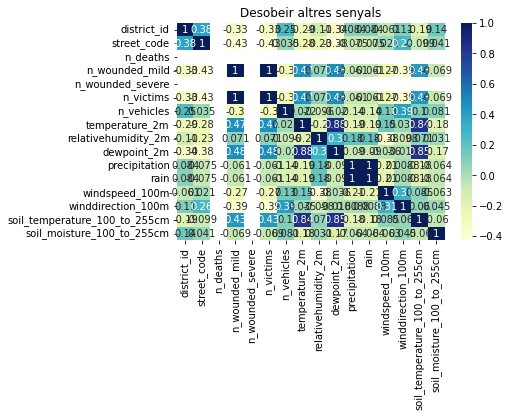

In [96]:
causes = list(set(full_data["cause_incident"]))
for i in causes:
    corr_matrix = full_data[full_data["cause_incident"] == i].corr()
    ax = plt.axes()
    dataplot = sns.heatmap(corr_matrix, cmap="YlGnBu", annot=True, )
    ax.set_title(i)
    plt.show()

Weather data and accident data do not seem to be very correalted. We could see a few higher correlation values when we took a further look at the incident types but nothing too relevant. Lets export these data sets for visualilzing either way.

In [97]:
full_data.to_csv('data/results/detailed.csv')
grouped_data.to_csv('data/results/grouped.csv')